# <center> Раздел 2. Модуль 5. Визуализация данных

In [2]:
import pandas as pd
#используем объединенный датасет о заболеваемости и вакцинации
#covid_df = pd.read_csv('D:/Python обучение/Pandas_learning/Pandas/Pandas_stady/data/covid_data/covid_df.csv') 
#используем объединенный датасет о заболеваемости и вакцинации PC2
covid_df = pd.read_csv('C:/Users/LeonidKogtev/Python_learning/Pandas/practice/Pandas_stady/data/covid_data/covid_df.csv') 
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df.head()

,date,country,confirmed,deaths,recovered,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,active,death_rate,recover_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2020-02-27,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2020-02-28,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


## <center> Графические возможности библиотеки seaborn
    

Seaborn - надстройка над библиотекой matplotlib, которая значительно расширяет ее возможности, позволяя создавать графики более высокого уровня с приятным для глаза оформлением. Библиотека дает большое количество дополнительных возможностей для творчества при визуализации данных.

In [3]:
#!pip install seaborn

Традиционно seaborn импортируется под псевдонимом sns:

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.__version__

'0.13.0'

В данном разделе мы будем сравнивать несколько стран: Россию, Австралию, Германию, Канаду и Великобританию. Создадим специальный DataFrame croped_covid_df для этих данных. 

Для того, чтобы показатели по странам стали сопоставимы: добавим информацию о населении стран, чтобы рассчитать ежедневную заболеваемость на 100 человек населения (заболеваемость в процентах от населения):

In [5]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed'] / croped_covid_df['population'] * 100

croped_covid_df.head()
# Указываем путь и имя файла для сохранения
#file_path = 'croped_covid_df.csv'

# Сохраняем DataFrame в CSV-файл
#croped_covid_df.to_csv(file_path, index=False)

,date,country,confirmed,deaths,recovered,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,...,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,active,death_rate,recover_rate,population,daily_confirmed_per_hundred,confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN,0.000000
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000,0.000016
3,2020-01-27,Australia,5.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004,0.000019
4,2020-01-28,Australia,5.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000,0.000019


Начнем с гистограммы. Для визуализации гистограмм в библиотеке seaborn используется метод histplot().
У данного метода (как и у всех в библиотеке seaborn) есть огромнейшее количество параметров. Мы приведем основные из них:
* data - DataFrame, по которому строим график
* x - признак, который будет отложен по оси абсцисс
* y - признак, который будет отображаться по оси ординат
* hue - группировочный категориальный признак, который позволяет строить отдельный график для каждой категории (не стоит его использовать для гистограмм, но он широко используется для других видов графиков в seaborn)
* ax - система координат matplotlib, в которой строится график
* color- цвет графика


* bins - число столбцов в гистограмме (по умолчанию вычисляется автоматически с помощью специальных формул)
* kde - параметр указывает, сглаживать ли гистограмму кривой (по умолчанию False)



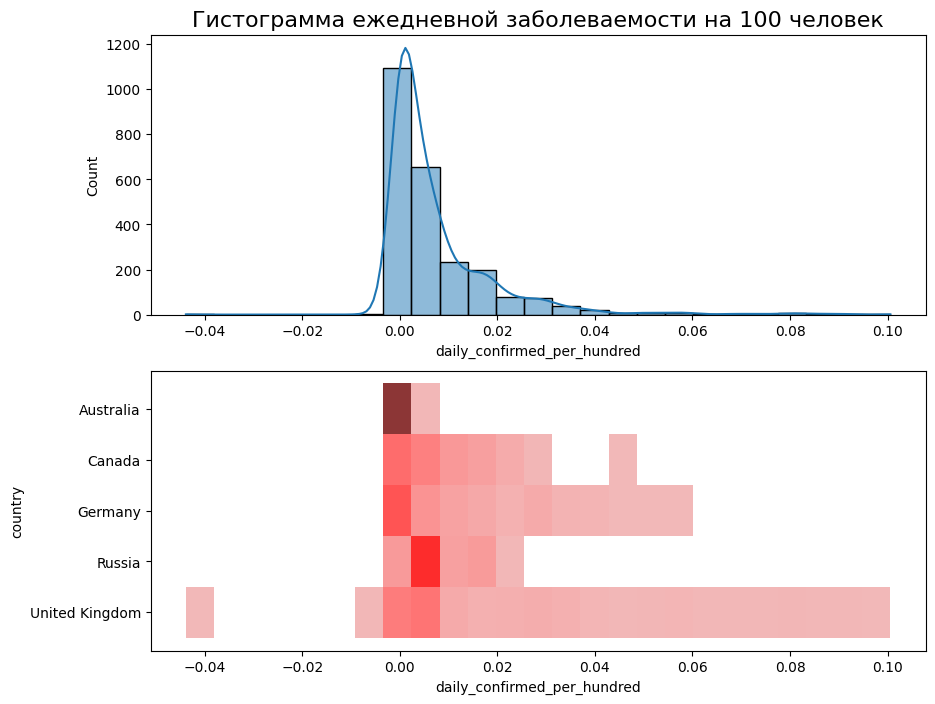

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);


Построим коробчатые диаграммы признака летальности (death_rate), который вы создавали ранее

Коробчатые диаграммы в seaborn строятся с помощью метода boxplot().
Ящики отразим горизонтально (для этого по оси x отложим признак летальности, а по оси y - страны), параметр orient отвечает за ориентацию диаграммы, а width - за ширину коробок:


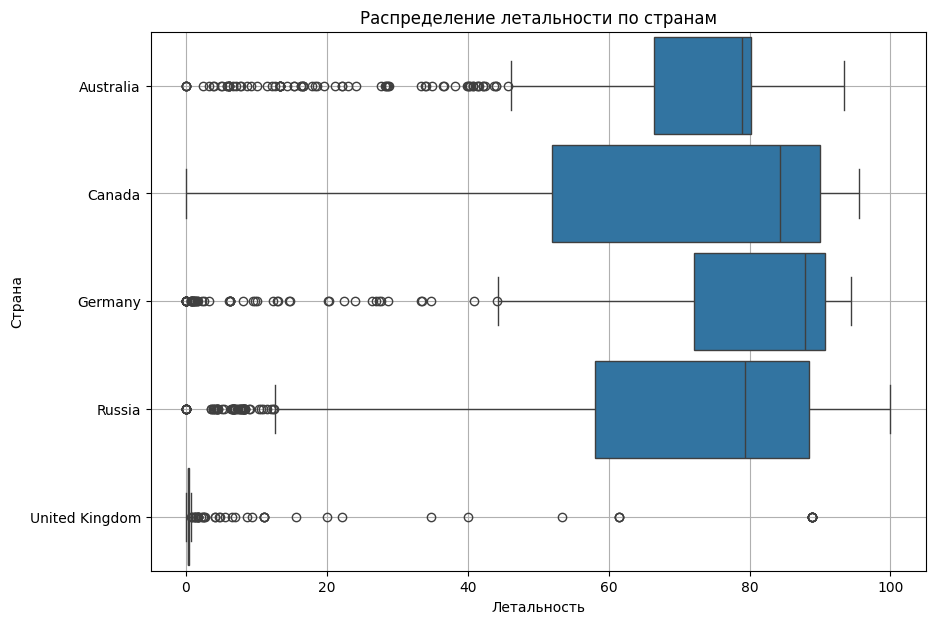

In [7]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='recover_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()


А теперь рассмотрим пример многоуровневой столбчатой диаграммы. С помощью нее мы можем, например, посмотреть на средний ежедневный процент заболевших в странах по кварталам.

Для построения столбчатых диаграмм в seaborn используется метод barplot(). По умолчанию метод отображает среднее по столбцу, который указан в параметре x (вместо среднего можно вычислить и любую другую статистическую характеристику, наименование которой задается в параметре estimator). Для добавления многоуровневости используется параметр hue, который позволяет группировать данные по признаку


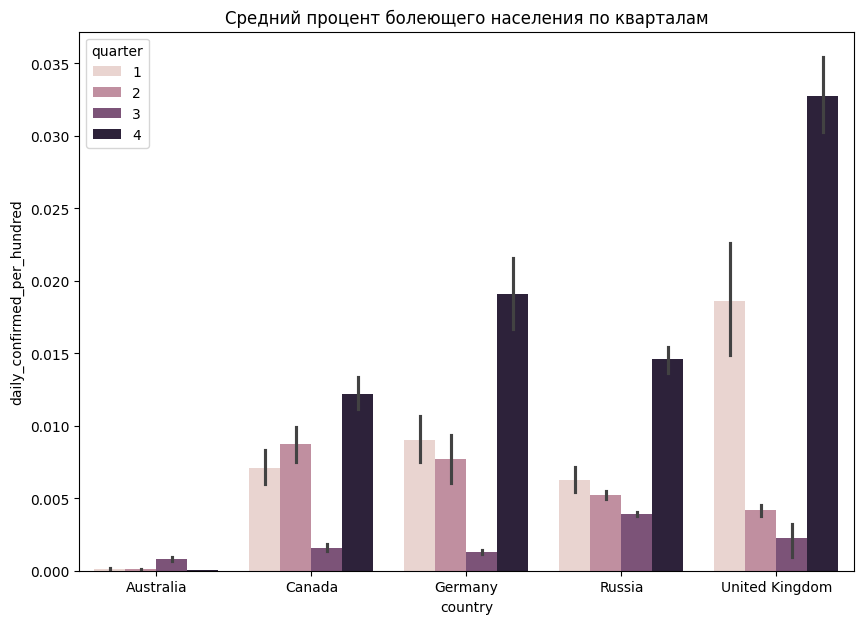

In [8]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам');


Построим joinplot на зависимость ежедневной заболеваемости в странах в проценте от населения (daily_confirmed_per_hundred) от числа полностью вакцинированных (people_fully_vaccinated_per_hundred) 
Параметры xlim и ylim определяют диапазон отображения осей x и y. Параметр height отвечает за высоту и ширину графика (он квадратный).


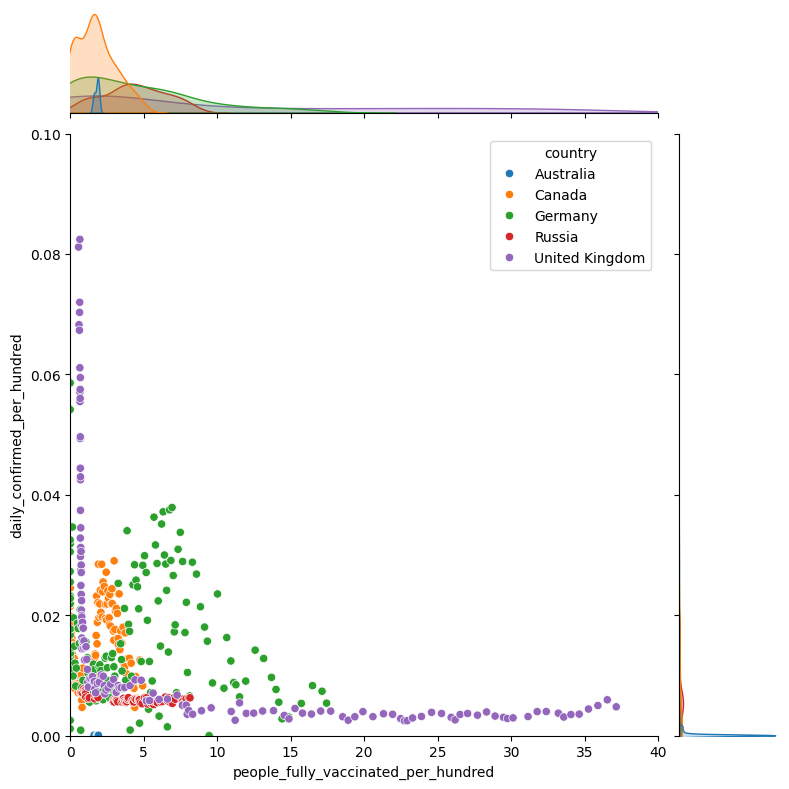

In [9]:
jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,
)

Когда мы хотим сравнить скорость изменения показателей по малому количеству категорий (в данном случае по странам их у нас их всего 5) нагляднее всего будет тепловая карта.

Предварительно создадим сводную таблицу: по столбцам отложим признак даты, а по строкам - страны, в ячейках таблицы будет находиться процент вакцинированных людей (1 ым компонентом) в стране на определенный день. Для того, чтобы даты отображались на тепловой карте верно, их необходимо привести к типу "string".


In [10]:
pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date,2020-01-23,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,0.0,0.000016,0.000016,0.000019,0.000019,0.000019,0.000035,0.000035,0.000047,0.000047,...,0.116606,0.116621,0.116637,0.116683,0.116722,0.116788,0.116854,0.116897,0.116932,0.116983
Canada,NaN,NaN,0.000003,0.000003,0.000005,0.000005,0.000008,0.000008,0.000011,0.000011,...,3.599497,3.611526,3.620169,3.628017,3.632706,3.642529,3.648718,3.661252,3.669520,3.675536
Germany,NaN,NaN,NaN,NaN,0.000005,0.000005,0.000005,0.000006,0.000010,0.000012,...,4.345962,4.355632,4.363299,4.368845,4.371625,4.374704,4.380047,4.388347,4.395716,4.401106
Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,0.000001,0.000001,...,3.368999,3.375035,3.380916,3.386963,3.392637,3.397954,3.403604,3.409708,3.415960,3.422232
United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000003,0.000003,0.000003,...,6.594230,6.598223,6.601946,6.605033,6.608528,6.612093,6.616504,6.621495,6.627439,6.632219


Для построения тепловой карты в seaborn используется метод heatmap(). Данный метод работает с табличными данными и визуализирует все ячейки таблицы с помощью цвета. Параметр cmap за цветовую гамму графика.


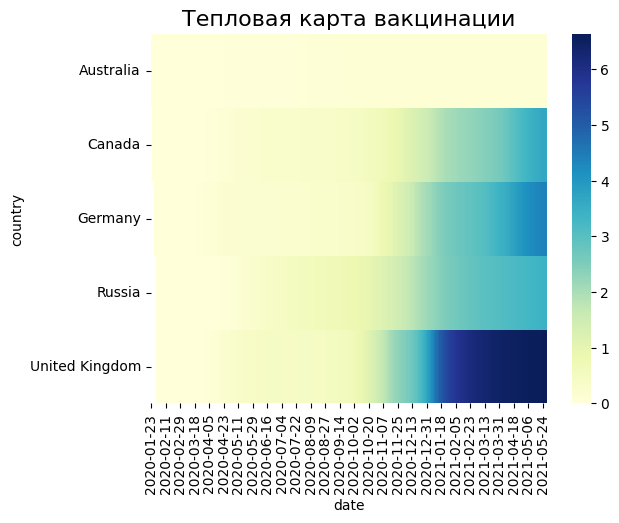

In [11]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);